In [1]:
#Begin with preselection cuts: trigger and has good PV

In [2]:
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [12]:
branches = [("pass_HLT_j30_muvtx_noiso"), ("hasGoodPV")]

In [3]:
sig_file = uproot.open("user.calpert.mc16_13TeV.311423.MGPy8EG_A14NNPDF23_NNPDF31ME_HSS_LLP_mH600_mS150_lthigh.032123_trees.root/user.calpert.311423.e7357_e5984_s3234_r10201_r10210_p4696.32829947._000001.trees.root:trees_DV_")

In [29]:
#Start by looking at histograms of trigger and goodPV of signal

Text(0.5, 1.0, 'Histogram of Trigger and Good PV (Signal)')

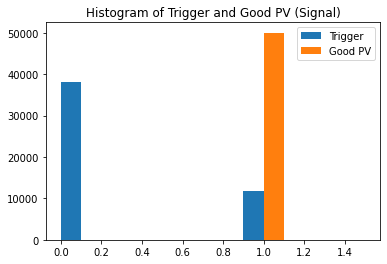

In [28]:
plt.hist(sig_file["pass_HLT_j30_muvtx_noiso"].array(), label = "Trigger")
plt.hist(sig_file["hasGoodPV"].array(), label = "Good PV")
plt.legend()
plt.title("Histogram of Trigger and Good PV (Signal)")

In [26]:
#All candidates have good PV, so we'd expect a preselection to contain all events that pass trigger, roughly 10,000 or so

In [39]:
sig_batch=sig_file.arrays(branches)

In [40]:
sig_cut = (batch.pass_HLT_j30_muvtx_noiso ==1) & (batch.hasGoodPV ==1)

In [42]:
sig_cut #Tells us which entries satisfy both conditions - an array of booleans

<Array [False, False, True, ... True, False] type='50000 * bool'>

In [43]:
presel_sig = sig_batch[cut] #Applies the cut to the both branches

In [44]:
presel_sig #As you can see we have about 20% of number of original events

<Array [{pass_HLT_j30_muvtx_noiso: 1, ... ] type='11859 * {"pass_HLT_j30_muvtx_n...'>

In [48]:
#Now that we have cut on our preselection, lets continue with MDT/RPC/TGC hits